# Regression

*Regressions are used to quantify the relationship between one variable and the other variables that are thought to explain it; regressions can also identify how close and well determined the relationship is.*
<center><img src="https://media.licdn.com/dms/image/D4D12AQEFaCVAm6O9Mw/article-cover_image-shrink_600_2000/0/1679254072302?e=2147483647&v=beta&t=CCIG62T5CEcAm_YUnh-m29vyitj4zInbVvfxWCP78ts" width="500px"/></center>

**Types of Regression:**
1. **Simple Linear Regression:** *Definition. Simple linear regression aims to find a linear relationship to describe the correlation between an independent and possibly dependent variable. The regression line can be used to predict or estimate missing values, this is known as interpolation.*

2. **Multiple Linear Regression:** *Multiple linear regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables using a straight line.*

3. **Polynomial Regression:** *Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modelled as an nth-degree polynomial.*

## Simple Linear Regression

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Read Dataset
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Show types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [4]:
# Identifying missing values and replacing them with mean or median
nulls_ids = df.horsepower.str.isdigit()
hp_nulls = np.where(~nulls_ids)[0]
df.iloc[hp_nulls, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [5]:
data = df.replace('?', np.nan)
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].astype('float64').mean())

In [7]:
# View changes
data.iloc[hp_nulls, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,104.469388,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,104.469388,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,104.469388,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,104.469388,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,104.469388,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,104.469388,3035,20.5,82,1,amc concord dl


In [8]:
# Definition x and y
y_s = np.asanyarray(data['mpg'])
x_s = np.asanyarray(data['weight']).reshape(-1, 1)

In [9]:
# Specify test and train
x_s_train, x_s_test, y_s_train, y_s_test = train_test_split(x_s, y_s, test_size=.3, random_state=5)

In [10]:
# Make model and fit
LR_model = LinearRegression()
LR_model.fit(x_s_train, y_s_train)

LinearRegression()

In [11]:
# Make predicate model 
LR_model_predict = LR_model.predict(x_s_test)
y_s_pred = pd.DataFrame(LR_model_predict, columns=['y_s_predict'])

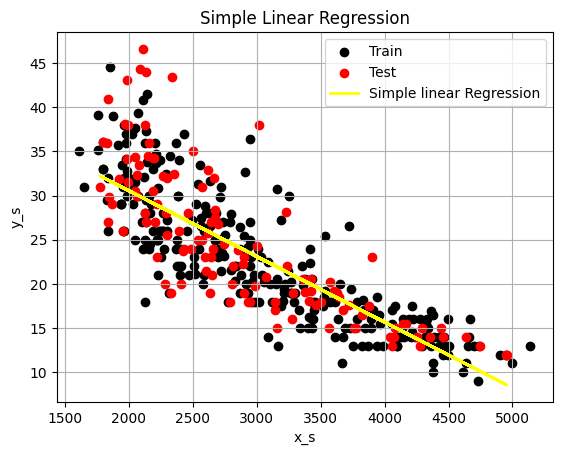

In [12]:
# Show scatter
plt.scatter(x_s_train, y_s_train, color='k', label='Train')
plt.scatter(x_s_test, y_s_test, color='red', label='Test')
plt.plot(x_s_test, y_s_pred, color='yellow', linewidth=2, label='Simple linear Regression')
plt.xlabel('x_s')
plt.ylabel('y_s')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid()
plt.show()

## Multiple Linear Regression

In [13]:
# Definition x and y
y_m = np.array(data['mpg'])
x1_m = np.array(data['weight']).reshape(-1, 1)
x2_m = np.array(data['cylinders']).reshape(-1, 1)

In [14]:
# Specify test and train
x_m_train, x_m_test, y_m_train, y_m_test = train_test_split(x1_m, y_m, test_size=.3, random_state=5)

In [15]:
# Make model and fit
MLR_model = LinearRegression()
MLR_model.fit(np.hstack((x1_m, x2_m)), y_m)

LinearRegression()

In [16]:
# Make predicate model
y_m_pred = MLR_model.predict(np.hstack((x1_m, x2_m)))

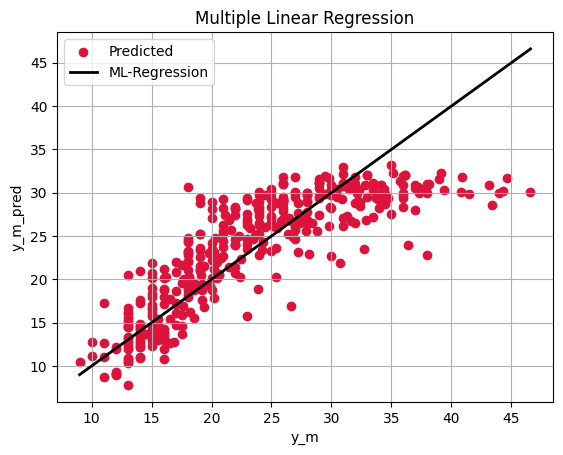

In [17]:
# Show scatter ?!
plt.scatter(y_m, y_m_pred, color='crimson', label='Predicted')
plt.plot([min(y_m), max(y_m)], [min(y_m), max(y_m)], color='k', linewidth=2, label='ML-Regression')
plt.xlabel('y_m')
plt.ylabel('y_m_pred')
plt.title('Multiple Linear Regression')
plt.legend()
plt.grid()
plt.show()

## Polynomial Regression

In [18]:
# Import Library
from sklearn.preprocessing import PolynomialFeatures

In [19]:
# Definition x and y
y_p = np.array(data['mpg'])
x_p = np.array(data['cylinders']).reshape(-1, 1)

In [20]:
# Specify test and train
x_p_train, x_p_test, y_p_train, y_p_test = train_test_split(x_p, y_p, test_size=.3, random_state=5)

In [21]:
pol = PolynomialFeatures(degree=2)
x_p_train_pol = pol.fit_transform(x_p_train)

In [22]:
PLR_model = LinearRegression()
PLR_model.fit(x_p_train_pol, y_p_train)

LinearRegression()

In [23]:
x_p_test_pol = pol.fit_transform(x_p_test)
y_p_pred = PLR_model.predict(x_p_test_pol)

In [24]:
frame = pd.DataFrame({'cylinders': np.squeeze(x_p_test), 'RMPG': y_p_test, 'PMPG': y_p_pred})

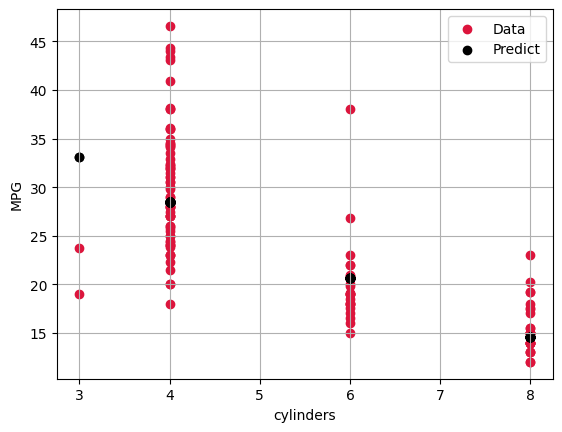

In [25]:
plt.scatter(x_p_test, y_p_test, color='crimson', label='Data')
plt.scatter(x_p_test, y_p_pred, color='k', label='Predict')
plt.legend()
plt.xlabel('cylinders')
plt.ylabel('MPG')
plt.grid()
plt.show()